#Importacion de librerias

In [1]:
import cv2                         # Importamos OpenCV para procesamiento de imágenes
import numpy as np                 # Importamos numpy para trabajar con matrices
import matplotlib.pyplot as plt    # Importamos matplotlib para visualizar resultados

# Creacion de imagenes de prueba

En este primer paso vamos a crear imágenes sintéticas para poder practicar el concepto de template matching. Generamos una imagen principal con formas y una imagen más pequeña que usaremos como plantilla para buscar dentro de la imagen principal.

##creaCION DE imagen principal

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
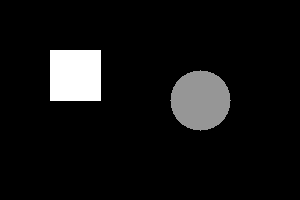

In [12]:
# Crear una imagen principal negra de 200x300 píxeles
main_image = np.zeros((200, 300), dtype=np.uint8)
# Dibujar un cuadrado blanco en la imagen principal
cv2.rectangle(main_image, (50, 50), (100, 100), 255, -1) # 255=blanco, -1=relleno completo
# Dibujar un círculo gris en la imagen principal
cv2.circle(main_image, (200, 100), 30, 150, -1)          # 150=gris



##plantilla

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
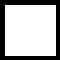

In [13]:
# Crear la plantilla: imagen de 60x60 píxeles negra
template = np.zeros((60, 60), dtype=np.uint8)
# Dibujar un cuadrado blanco dentro de la plantilla (el que queremos encontrar)
cv2.rectangle(template, (5, 5), (55, 55), 255, -1)


#Obtener dimensiones de la plantilla

Es importante saber el tamaño de la plantilla para poder luego dibujar el rectángulo exacto donde la encontremos dentro de la imagen principal.

In [16]:
h, w = template.shape   # 'h' es el alto y 'w' es el ancho de la plantilla
print(f"Dimensiones de la plantilla: Alto {h} píxeles, Ancho {w} píxeles")

Dimensiones de la plantilla: Alto 60 píxeles, Ancho 60 píxeles


#Template Matching

In [17]:
# Realizar template matching usando correlación normalizada
res = cv2.matchTemplate(main_image, template, cv2.TM_CCOEFF_NORMED)

In [18]:
# --- Encontrar la ubicación de la mejor coincidencia ---
# Encontrar la ubicación con el puntaje de correlación máximo
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [19]:
# max_loc da la esquina superior izquierda del área coincidente
top_left = max_loc
# Calcular la esquina inferior derecha sumando el ancho y alto de la plantilla
bottom_right = (top_left[0] + w, top_left[1] + h)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
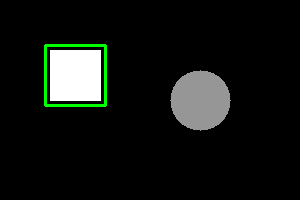

In [8]:
# --- Dibujar un rectángulo alrededor del área coincidente en la imagen principal ---
# Crear una copia a color para dibujar el rectángulo en color
main_image_color = cv2.cvtColor(main_image, cv2.COLOR_GRAY2BGR)
cv2.rectangle(main_image_color, top_left, bottom_right, (0, 255, 0), 2) # Rectángulo verde, grosor 2

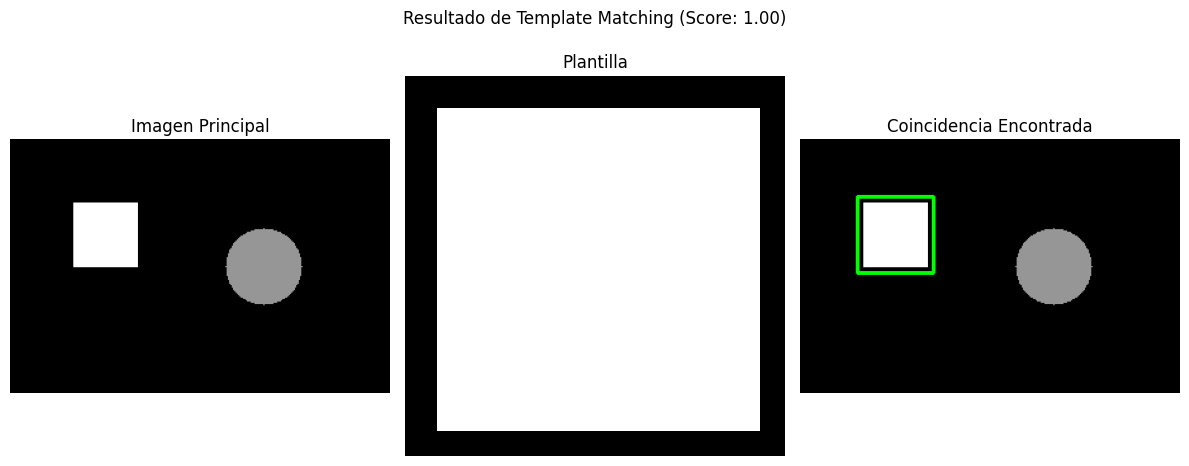

In [21]:
# --- Mostrar los resultados usando Matplotlib ---

plt.figure(figsize=(12, 5))  # Crea una nueva figura con tamaño ancho=12 y alto=5

plt.subplot(131)  # Divide la figura en 1 fila y 3 columnas, y activa la primera posición
plt.imshow(main_image, cmap='gray')  # Muestra la imagen principal en escala de grises
plt.title('Imagen Principal')         # Título de este panel
plt.axis('off')                      # Oculta los ejes para que quede más prolijo

plt.subplot(132)  # Activa la segunda posición (2° panel)
plt.imshow(template, cmap='gray')    # Muestra la plantilla también en escala de grises
plt.title('Plantilla')               # Título de este panel
plt.axis('off')                      # Oculta los ejes

plt.subplot(133)  # Activa la tercera posición (3° panel)
# Convierte la imagen color de BGR (formato OpenCV) a RGB (formato matplotlib) y la muestra
plt.imshow(cv2.cvtColor(main_image_color, cv2.COLOR_BGR2RGB))
plt.title('Coincidencia Encontrada') # Título de este panel
plt.axis('off')                      # Oculta los ejes

plt.suptitle(f'Resultado de Template Matching (Score: {max_val:.2f})')
# Agrega un título general arriba de todos los paneles, mostrando el score de coincidencia

plt.tight_layout()  # Ajusta automáticamente el espaciado entre los paneles
plt.show()          # Muestra en pantalla la figura completa con los 3 paneles


In [22]:
# Imprimir información en la consola
print(f"Plantilla encontrada en la posición (esquina superior izquierda): {top_left}")
print(f"Máximo score de correlación: {max_val:.4f}")

Plantilla encontrada en la posición (esquina superior izquierda): (45, 45)
Máximo score de correlación: 1.0000


In [23]:
# Explicación:
# - Creamos una imagen principal y una imagen de plantilla más pequeña.
# - `cv2.matchTemplate` desliza la plantilla sobre la imagen principal y calcula un puntaje de similitud en cada posición.
# - `cv2.minMaxLoc` encuentra la posición donde el puntaje de similitud es más alto (para TM_CCOEFF_NORMED).
# - Dibujamos un rectángulo en esa posición para mostrar la coincidencia.
# - Usamos Matplotlib para mostrar la imagen original, la plantilla y el resultado lado a lado.

# PRACTICA

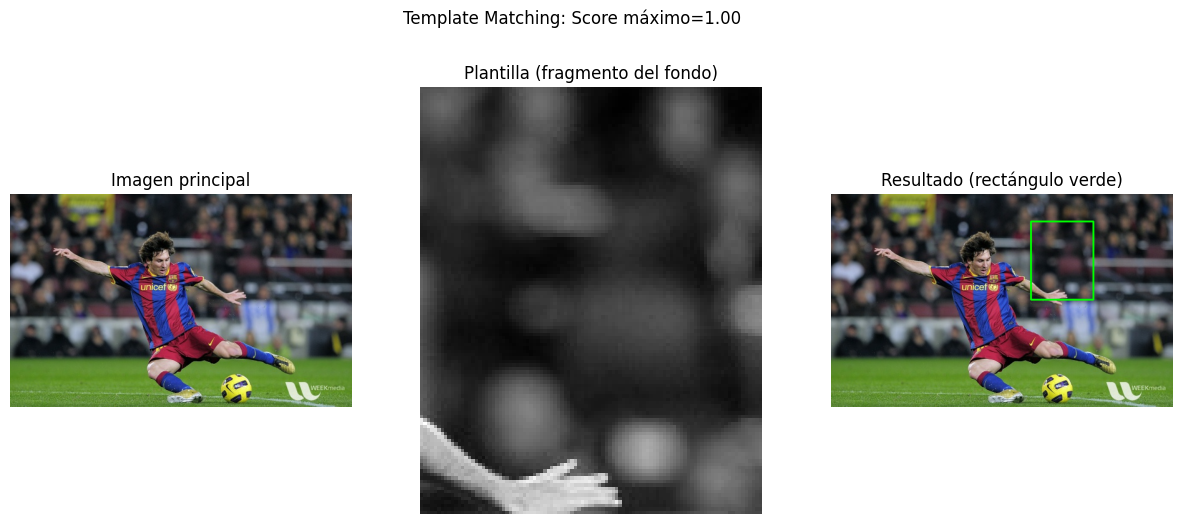

Coordenadas encontradas: (320, 45)
Score máximo: 1.0000


In [25]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt

# 1. Descargar una imagen real de internet (foto de Messi)
url_fondo = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/messi5.jpg'

# Descargamos la imagen de fondo (Messi en un partido)
headers = {'User-Agent': 'Mozilla/5.0'}
resp = requests.get(url_fondo, headers=headers)
resp.raise_for_status()
image_arr = np.asarray(bytearray(resp.content), dtype=np.uint8)
main_image_color = cv2.imdecode(image_arr, cv2.IMREAD_COLOR) # BGR

# 2. Convertimos a escala de grises para hacer template matching más robusto
main_image_gray = cv2.cvtColor(main_image_color, cv2.COLOR_BGR2GRAY)

# 3. Recortamos una zona del fondo como plantilla
# Estas coordenadas corresponden a una parte del fondo borroso, no a la cara de Messi
template = main_image_gray[45:170, 320:420] # y1:y2, x1:x2

# 4. Obtenemos las dimensiones de la plantilla
h, w = template.shape

# 5. Realizamos template matching (coincidencia de plantilla)
res = cv2.matchTemplate(main_image_gray, template, cv2.TM_CCOEFF_NORMED)

# 6. Encontramos la mejor coincidencia
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# 7. Dibujamos el resultado sobre la imagen original a color
result_image = main_image_color.copy()
cv2.rectangle(result_image, top_left, bottom_right, (0,255,0), 2)

# 8. Mostramos todo el proceso con Matplotlib
plt.figure(figsize=(15,6))

# Imagen completa original
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(main_image_color, cv2.COLOR_BGR2RGB))
plt.title("Imagen principal")
plt.axis("off")

# Plantilla (fragmento del fondo)
plt.subplot(1,3,2)
plt.imshow(template, cmap="gray")
plt.title("Plantilla (fragmento del fondo)")
plt.axis("off")

# Resultado con rectángulo donde encontró el match
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Resultado (rectángulo verde)")
plt.axis("off")

plt.suptitle(f"Template Matching: Score máximo={max_val:.2f}")
plt.show()

# 9. Información útil en consola
print(f"Coordenadas encontradas: {top_left}")
print(f"Score máximo: {max_val:.4f}")
